In [1]:
import numpy as np
import matplotlib.pyplot as plt

# GAUSSIAN
## PART I

Data generation

(a) Use Gaussian distribution with appropriate parameters and produce a dataset with
four classes and 30 samples per class: 

the classes must live in the 2D space and becentered on the corners of the unit square (0,0), (0,1) (1,1), (1,0), 

all with independent components each with variance 0.3.



(b) Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the
same class with labels +1 and -1.



(c) Generate a test set $[X_{te}, Y_{te}]$ from the same distribution, starting with 200 samples
per class.


(d) Visualize both sets using a scatter plot on a 2-D plane.

(e) Repeat (a)-(d) for Laplace distribution.

In [2]:
# TRAIN

train_samples_per_class = 30

# Set the variance for each class
variance = 0.3

n1a = np.random.normal(loc=[0, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n1b = np.random.normal(loc=[1, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2a = np.random.normal(loc=[0, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2b = np.random.normal(loc=[1, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))

labels = np.array([1]*train_samples_per_class*2 + [-1]*train_samples_per_class*2)


X_train = np.vstack([n1a, n1b, n2a, n2b])
Y_train = labels

shuffle_idx = np.random.permutation(X_train.shape[0])
X_train = X_train[shuffle_idx]
Y_train = Y_train[shuffle_idx]


# TEST


test_samples_per_class = 200

n1a = np.random.normal(loc=[0, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n1b = np.random.normal(loc=[1, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2a = np.random.normal(loc=[0, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2b = np.random.normal(loc=[1, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))

labels = np.array([1]*test_samples_per_class*2 + [-1]*test_samples_per_class*2)


X_test = np.vstack([n1a, n1b, n2a, n2b])
Y_test = labels

shuffle_idx = np.random.permutation(X_test.shape[0])
X_test = X_test[shuffle_idx]
Y_test = Y_test[shuffle_idx]

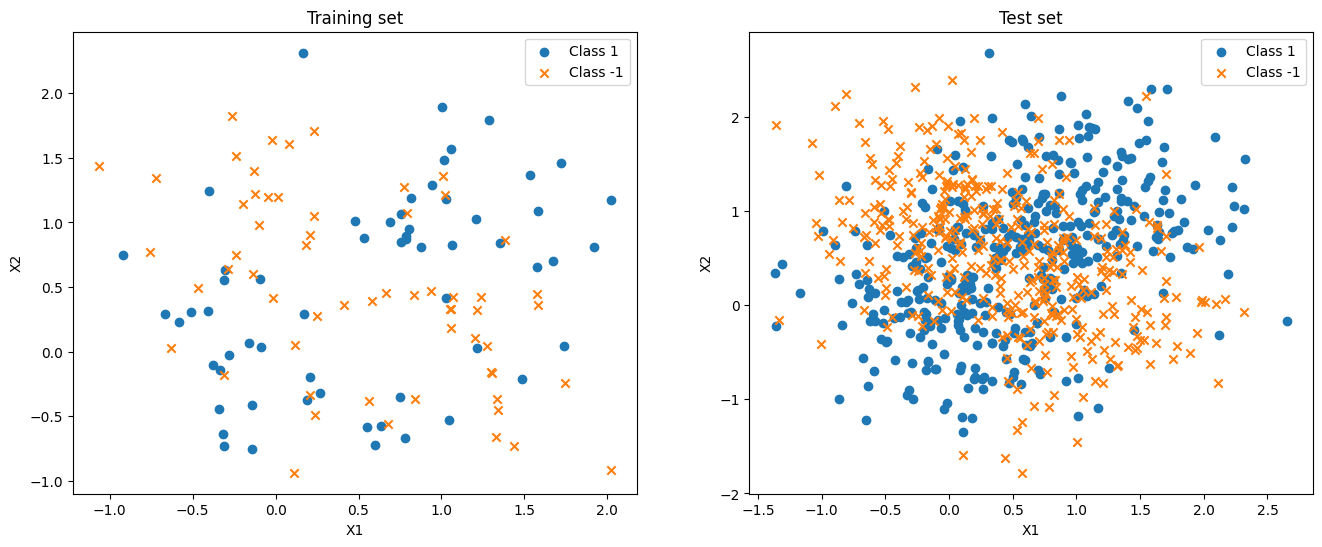

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label='Class 1', marker='o')
ax[0].scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], label='Class -1', marker='x')
ax[0].set_title('Training set')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].legend()

ax[1].scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Class 1', marker='o')
ax[1].scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], label='Class -1', marker='x')
ax[1].set_title('Test set')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
ax[1].legend()
plt.show()

## PART II

### Q1
kNN classification (Attempt first for the Gaussian dataset, then repeat for the
Laplacian dataset)

1. The k-Nearest Neighbors algorithm (kNN) assigns to a test point the most frequent
label of its k closest examples in the training set.

    (a) Write a function kNNClassify to generate predictions Yp for the 2-class data

    generated at Section 1. Pick a "reasonable" k.

    (b) Evaluate the classification performance (prediction error) by comparing the predicted labels Yp to the true labels Yte


    (c) Visualize the obtained results, e.g. by plotting the wrongly classified points using different colors/markers:

    (d) Write a function to generate & visualize the decision regions of the 2D plane that are associated with each class, for a given classifier. Overlay the test points using scatter.

In [4]:
n_neighbors = 15

def kNNClassify(X_train, Y_train, X_test, n_neighbors):

    distances = np.sqrt(np.sum((X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :])**2, axis=2))   
    
    kNN_loc = np.argsort(distances, axis=1)[:, :n_neighbors]
    
    k_NN_labels = Y_train[kNN_loc]
    
    Y_pred = np.array([np.argmax(np.bincount(x+1)) for x in k_NN_labels]) # +1 as bincount needs non-negative integers
    
    
    return Y_pred-1

In [5]:
Y_pred = kNNClassify(X_train, Y_train, X_test, n_neighbors)

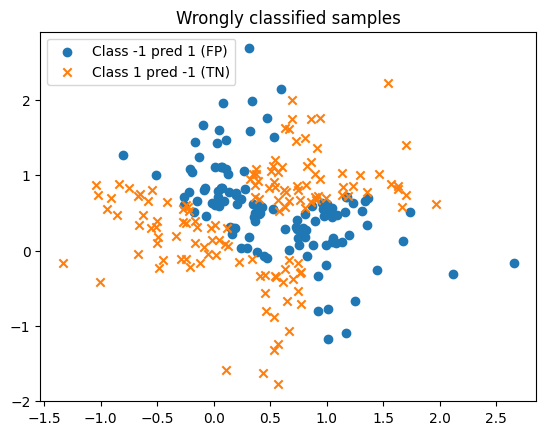

In [6]:
wrong_loc = np.array([i for i in range(len(Y_pred)) if Y_pred[i] != Y_test[i]])

X_wrong = X_test[wrong_loc]
Y_wrong = Y_test[wrong_loc]

plt.scatter(X_wrong[Y_wrong == 1][:, 0], X_wrong[Y_wrong == 1][:, 1], label='Class -1 pred 1 (FP)', marker='o')
plt.scatter(X_wrong[Y_wrong == -1][:, 0], X_wrong[Y_wrong == -1][:, 1], label='Class 1 pred -1 (TN)', marker='x')
plt.legend()
plt.title('Wrongly classified samples')
plt.show()



In [7]:
# Accuracy
accuracy = 100 * np.count_nonzero(Y_test == Y_pred)/len(Y_test)
print("Classification accuracy: ", accuracy)

Classification accuracy:  68.625


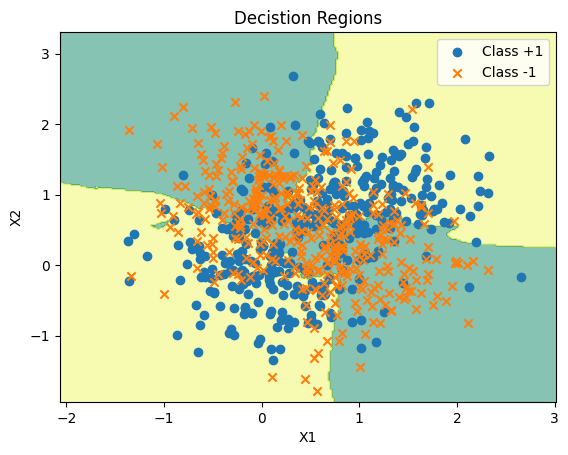

In [8]:
def plot_decision_regions(X, Y, X_test, Y_test):
    h = 0.02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = kNNClassify(X, Y, np.c_[xx.ravel(), yy.ravel()], n_neighbors)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=0.5)

    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Class +1', marker='o')
    plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], label='Class -1', marker='x')

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.title("Decistion Regions")
    plt.show()


plot_decision_regions(X_train, Y_train, X_test, Y_test)

### Q2

(a) Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for
validation.

In [9]:
hold_out_rho = 0.3
k = 5
n_rep = 10
def outCVkNN(X, Y, k, n_rep, hold_out_rho):
    n = len(X)
    n_hold_out = int(n*hold_out_rho)
    hold_out_accuracy = np.zeros(n_rep)
    train_accuracy = np.zeros(n_rep)
    for i in range(n_rep):
        shuffle_idx = np.random.permutation(n)
        X_train = X[shuffle_idx]
        Y_train = Y[shuffle_idx]
        X_hold_out = X_train[:n_hold_out]
        Y_hold_out = Y_train[:n_hold_out]
        X_train = X_train[n_hold_out:]
        Y_train = Y_train[n_hold_out:]
        Y_pred_hold_out = kNNClassify(X_train, Y_train, X_hold_out, k)
        hold_out_accuracy[i] = np.count_nonzero(Y_hold_out == Y_pred_hold_out)/len(Y_hold_out)
        Y_pred_train = kNNClassify(X_train, Y_train, X_train, k)
        train_accuracy[i] = np.count_nonzero(Y_train == Y_pred_train)/len(Y_train)
        
        
    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

In [10]:
aaa = []
for k in range(1, 23, 2):
    knnout = outCVkNN(X_train, Y_train, k, n_rep, hold_out_rho)
    print("k = ", k, ": ", knnout)
    aaa.append(knnout)

k =  1 :  [ 62.5 100. ]
k =  3 :  [70.28 79.17]
k =  5 :  [70.   77.62]
k =  7 :  [71.39 79.29]
k =  9 :  [71.67 79.52]
k =  11 :  [73.33 78.81]
k =  13 :  [76.11 75.71]
k =  15 :  [71.11 77.02]
k =  17 :  [71.39 75.36]
k =  19 :  [69.44 74.76]
k =  21 :  [72.22 73.69]


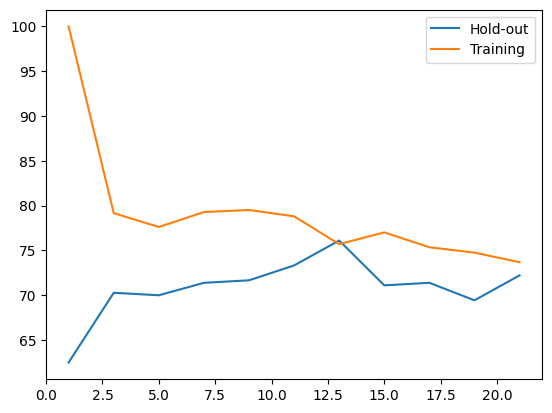

In [11]:
plt.plot(range(1, 23, 2), [x[0] for x in aaa], label="Hold-out")
plt.plot(range(1, 23, 2), [x[1] for x in aaa], label="Training")
plt.legend()
plt.show()

In [12]:
k_best = np.argmax([x[0] for x in aaa])*2+1
print('k =', k_best, 'is the best k for hold-out')

k = 13 is the best k for hold-out


(b) How is the value of k affected by ρ (percentage of points held out) and number of
repetitions? What does a large number of repetitions provide?

In [13]:
# Rho vs k
best_k = []
for rho in [0.1, 0.3, 0.5, 0.7, 0.9]:
    # print("rho = ", rho, ": ", outCVkNN(X_train, Y_train, 5, 10, rho))
    aaa = []
    for k in range(1, 23, 2):
        knnout = outCVkNN(X_train, Y_train, k, n_rep, hold_out_rho)
        aaa.append(knnout)
    best_k.append(np.argmax([x[0] for x in aaa])*2+1)
    print('Rho = ' + str(rho) + ': k =', np.argmax([x[0] for x in aaa])*2+1, 'is the best k for hold-out')


Rho = 0.1: k = 9 is the best k for hold-out
Rho = 0.3: k = 17 is the best k for hold-out
Rho = 0.5: k = 13 is the best k for hold-out
Rho = 0.7: k = 11 is the best k for hold-out
Rho = 0.9: k = 7 is the best k for hold-out


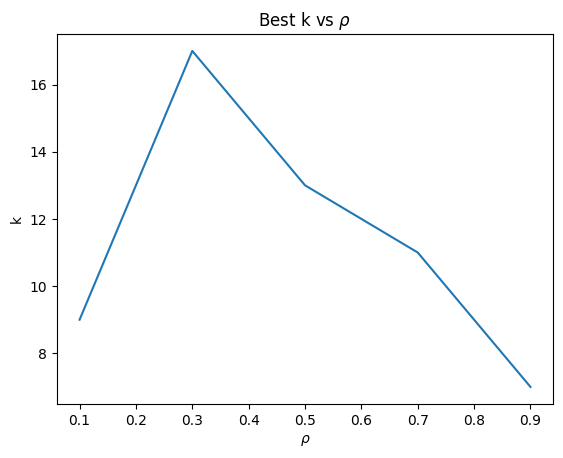

In [14]:
plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], best_k)
plt.xlabel("$\\rho$")
plt.ylabel("k")
plt.title("Best k vs $\\rho$")
plt.show()

In [15]:
for n_rep in [1, 5, 10, 20, 30]:
    print("n_rep = ", n_rep, ": ", outCVkNN(X_train, Y_train, 5, n_rep, 0.3))

n_rep =  1 :  [80.56 70.24]
n_rep =  5 :  [75.   75.24]
n_rep =  10 :  [70.   78.45]
n_rep =  20 :  [69.44 79.05]
n_rep =  30 :  [69.35 78.93]


In [16]:
best_k_nrep = []
for n_rep in [1, 5, 10, 20, 30]:
    # print("rho = ", rho, ": ", outCVkNN(X_train, Y_train, 5, 10, rho))
    aaa = []
    for k in range(1, 23, 2):
        knnout = outCVkNN(X_train, Y_train, k, n_rep, 0.3)
        aaa.append(knnout)
    best_k_nrep.append(np.argmax([x[0] for x in aaa])*2+1)
    # print('N_rep = ' + str(rho) + ': k = ', np.argmax([x[0] for x in aaa])*2+1, 'is the best k for hold-out')
    print('For = ' + str(n_rep) + ' repetitions: k = ', np.argmax([x[0] for x in aaa])*2+1, 'is the best')


For = 1 repetitions: k =  15 is the best
For = 5 repetitions: k =  11 is the best
For = 10 repetitions: k =  13 is the best
For = 20 repetitions: k =  11 is the best
For = 30 repetitions: k =  7 is the best


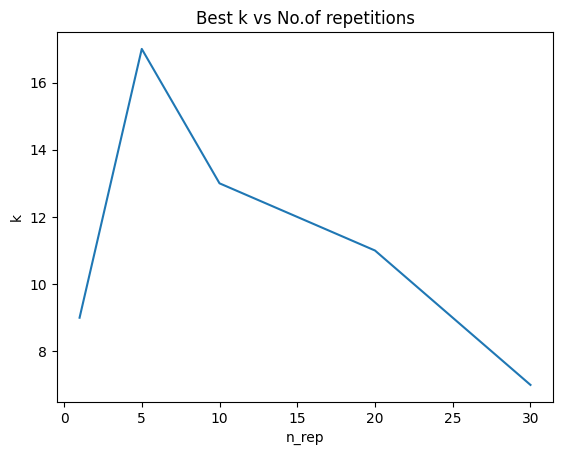

In [17]:
#k vs n_rep
plt.plot([1, 5, 10, 20, 30], best_k)
plt.xlabel('n_rep')
plt.ylabel('k')
plt.title('Best k vs No.of repetitions')
plt.show()

(c) Apply the model obtained by cross-validation (i.e., best k) to the test set and check if
there is an improvement on the classification error over the result of (1).

In [18]:
acc_cv = 100 * np.count_nonzero(kNNClassify(X_train, Y_train, X_test, k_best) == Y_test)/len(Y_test)
# Accuracy
print("Classification accuracy: ", acc_cv)

Classification accuracy:  69.5


In [19]:
if acc_cv > accuracy:
    print("Improved accuracy over (1)")
    
else:
    print("No improvement over (1)")

Improved accuracy over (1)


# LAPLACE

## PART I

(e) Repeat (a)-(d) for Laplace distribution.

In [20]:
# TRAIN

train_samples_per_class = 30

# Set the variance for each class
variance = 0.3

n1a = np.random.laplace(loc=[0, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n1b = np.random.laplace(loc=[1, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2a = np.random.laplace(loc=[0, 1], scale=np.sqrt(variance), size=(train_samples_per_class, 2))
n2b = np.random.laplace(loc=[1, 0], scale=np.sqrt(variance), size=(train_samples_per_class, 2))

labels = np.array([1]*train_samples_per_class*2 + [-1]*train_samples_per_class*2)


X_train = np.vstack([n1a, n1b, n2a, n2b])
Y_train = labels

shuffle_idx = np.random.permutation(X_train.shape[0])
X_train = X_train[shuffle_idx]
Y_train = Y_train[shuffle_idx]


# TEST


test_samples_per_class = 200

n1a = np.random.laplace(loc=[0, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n1b = np.random.laplace(loc=[1, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2a = np.random.laplace(loc=[0, 1], scale=np.sqrt(variance), size=(test_samples_per_class, 2))
n2b = np.random.laplace(loc=[1, 0], scale=np.sqrt(variance), size=(test_samples_per_class, 2))

labels = np.array([1]*test_samples_per_class*2 + [-1]*test_samples_per_class*2)


X_test = np.vstack([n1a, n1b, n2a, n2b])
Y_test = labels

shuffle_idx = np.random.permutation(X_test.shape[0])
X_test = X_test[shuffle_idx]
Y_test = Y_test[shuffle_idx]

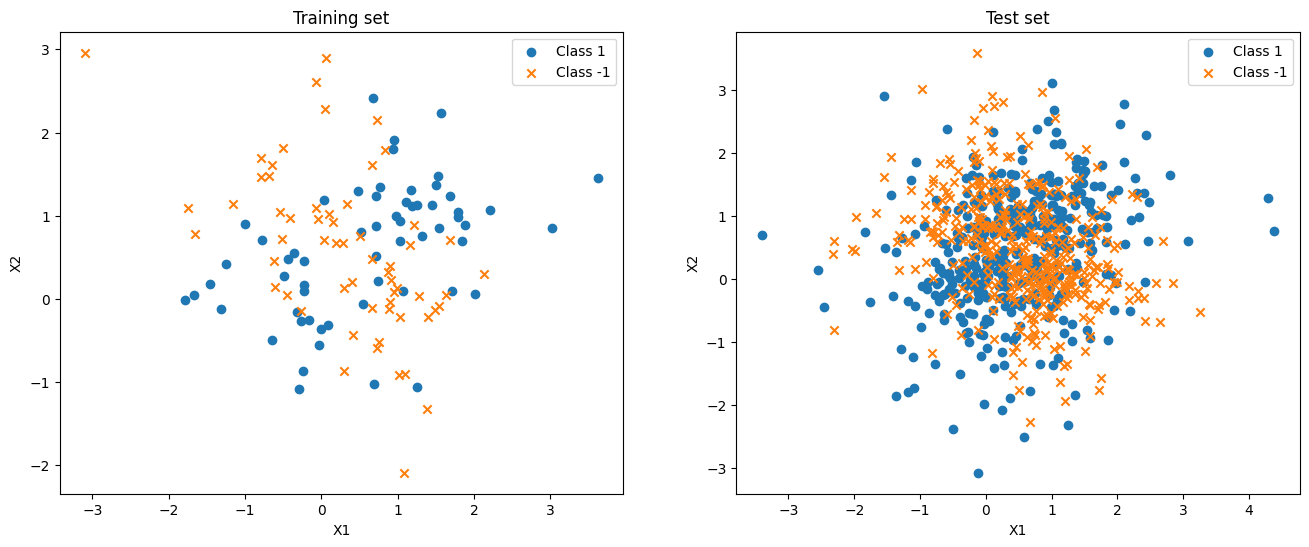

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(X_train[Y_train == 1][:, 0], X_train[Y_train == 1][:, 1], label='Class 1', marker='o')
ax[0].scatter(X_train[Y_train == -1][:, 0], X_train[Y_train == -1][:, 1], label='Class -1', marker='x')
ax[0].set_title('Training set')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].legend()

ax[1].scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Class 1', marker='o')
ax[1].scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], label='Class -1', marker='x')
ax[1].set_title('Test set')
ax[1].set_xlabel('X1')
ax[1].set_ylabel('X2')
ax[1].legend()
plt.show()

## PART II

### Q1

kNN classification

1. The k-Nearest Neighbors algorithm (kNN) assigns to a test point the most frequent
label of its k closest examples in the training set.

    (a) Write a function kNNClassify to generate predictions Yp for the 2-class data

    generated at Section 1. Pick a "reasonable" k.

    (b) Evaluate the classification performance (prediction error) by comparing the predicted labels Yp to the true labels Yte


    (c) Visualize the obtained results, e.g. by plotting the wrongly classified points using different colors/markers:

    (d) Write a function to generate & visualize the decision regions of the 2D plane that are associated with each class, for a given classifier. Overlay the test points using scatter.

In [22]:
n_neighbors = 15

def kNNClassify(X_train, Y_train, X_test, n_neighbors):

    distances = np.sqrt(np.sum((X_test[:, np.newaxis, :] - X_train[np.newaxis, :, :])**2, axis=2))   
    
    kNN_loc = np.argsort(distances, axis=1)[:, :n_neighbors]
    
    k_NN_labels = Y_train[kNN_loc]
    
    Y_pred = np.array([np.argmax(np.bincount(x+1)) for x in k_NN_labels]) # +1 as bincount needs non-negative integers
    
    
    return Y_pred-1

In [23]:
Y_pred = kNNClassify(X_train, Y_train, X_test, n_neighbors)

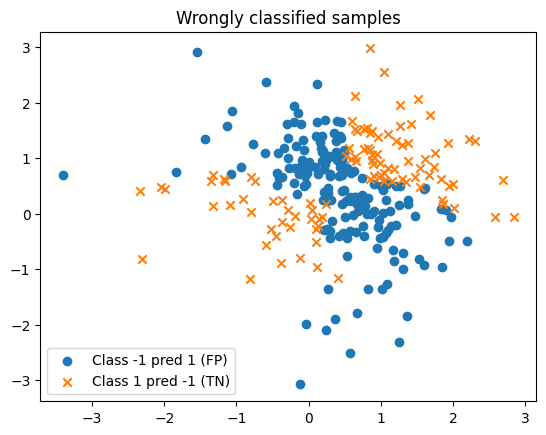

In [24]:
wrong_loc = np.array([i for i in range(len(Y_pred)) if Y_pred[i] != Y_test[i]])

X_wrong = X_test[wrong_loc]
Y_wrong = Y_test[wrong_loc]

plt.scatter(X_wrong[Y_wrong == 1][:, 0], X_wrong[Y_wrong == 1][:, 1], label='Class -1 pred 1 (FP)', marker='o')
plt.scatter(X_wrong[Y_wrong == -1][:, 0], X_wrong[Y_wrong == -1][:, 1], label='Class 1 pred -1 (TN)', marker='x')
plt.legend()
plt.title('Wrongly classified samples')
plt.show()



In [25]:
# Accuracy
accuracy = 100 * np.count_nonzero(Y_test == Y_pred)/len(Y_test)
print("Classification accuracy: ", accuracy)

Classification accuracy:  65.75


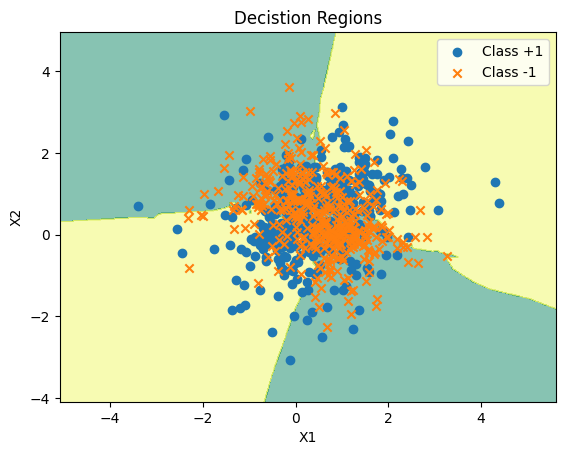

In [26]:
def plot_decision_regions(X, Y, X_test, Y_test):
    h = 0.02

    x_min, x_max = X[:, 0].min() - 2, X[:, 0].max() + 2
    y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = kNNClassify(X, Y, np.c_[xx.ravel(), yy.ravel()], n_neighbors)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.summer, alpha=0.5)

    plt.scatter(X_test[Y_test == 1][:, 0], X_test[Y_test == 1][:, 1], label='Class +1', marker='o')
    plt.scatter(X_test[Y_test == -1][:, 0], X_test[Y_test == -1][:, 1], label='Class -1', marker='x')

    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.legend()
    plt.title("Decistion Regions")
    plt.show()


plot_decision_regions(X_train, Y_train, X_test, Y_test)

### Q2

(a) Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for
validation.

In [27]:
hold_out_rho = 0.3
k = 5
n_rep = 10
def outCVkNN(X, Y, k, n_rep, hold_out_rho):
    n = len(X)
    n_hold_out = int(n*hold_out_rho)
    hold_out_accuracy = np.zeros(n_rep)
    train_accuracy = np.zeros(n_rep)
    for i in range(n_rep):
        shuffle_idx = np.random.permutation(n)
        X_train = X[shuffle_idx]
        Y_train = Y[shuffle_idx]
        X_hold_out = X_train[:n_hold_out]
        Y_hold_out = Y_train[:n_hold_out]
        X_train = X_train[n_hold_out:]
        Y_train = Y_train[n_hold_out:]
        Y_pred_hold_out = kNNClassify(X_train, Y_train, X_hold_out, k)
        hold_out_accuracy[i] = np.count_nonzero(Y_hold_out == Y_pred_hold_out)/len(Y_hold_out)
        Y_pred_train = kNNClassify(X_train, Y_train, X_train, k)
        train_accuracy[i] = np.count_nonzero(Y_train == Y_pred_train)/len(Y_train)
        
        
    return np.round([np.mean(hold_out_accuracy)*100, np.mean(train_accuracy)*100], 2)

In [28]:
aaa = []
for k in range(1, 23, 2):
    knnout = outCVkNN(X_train, Y_train, k, n_rep, hold_out_rho)
    print("k = ", k, ": ", knnout)
    aaa.append(knnout)

k =  1 :  [ 67.5 100. ]
k =  3 :  [67.78 82.38]
k =  5 :  [74.17 80.6 ]
k =  7 :  [75.28 78.1 ]
k =  9 :  [75.  78.1]
k =  11 :  [73.89 79.76]
k =  13 :  [74.44 78.57]
k =  15 :  [72.22 77.38]
k =  17 :  [73.06 78.93]
k =  19 :  [71.94 79.17]
k =  21 :  [71.11 75.83]


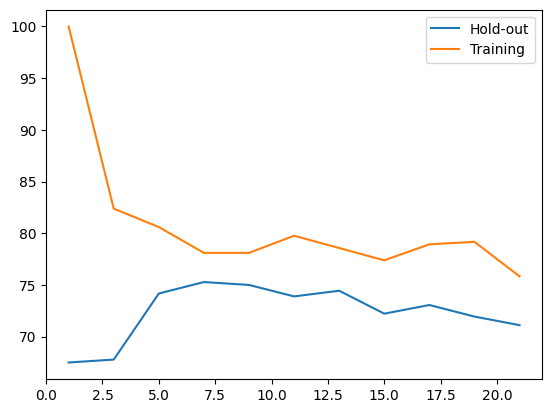

In [29]:
plt.plot(range(1, 23, 2), [x[0] for x in aaa], label="Hold-out")
plt.plot(range(1, 23, 2), [x[1] for x in aaa], label="Training")
plt.legend()
plt.show()

In [30]:
k_best = np.argmax([x[0] for x in aaa])*2+1
print('k =', k_best, 'is the best k for hold-out')

k = 7 is the best k for hold-out


(b) How is the value of k affected by ρ (percentage of points held out) and number of
repetitions? What does a large number of repetitions provide?

In [31]:
# Rho vs k
best_k = []
for rho in [0.1, 0.3, 0.5, 0.7, 0.9]:
    # print("rho = ", rho, ": ", outCVkNN(X_train, Y_train, 5, 10, rho))
    aaa = []
    for k in range(1, 23, 2):
        knnout = outCVkNN(X_train, Y_train, k, n_rep, hold_out_rho)
        aaa.append(knnout)
    best_k.append(np.argmax([x[0] for x in aaa])*2+1)
    print('Rho = ' + str(rho) + ': k =', np.argmax([x[0] for x in aaa])*2+1, 'is the best k for hold-out')


Rho = 0.1: k = 17 is the best k for hold-out
Rho = 0.3: k = 13 is the best k for hold-out
Rho = 0.5: k = 9 is the best k for hold-out
Rho = 0.7: k = 11 is the best k for hold-out
Rho = 0.9: k = 5 is the best k for hold-out


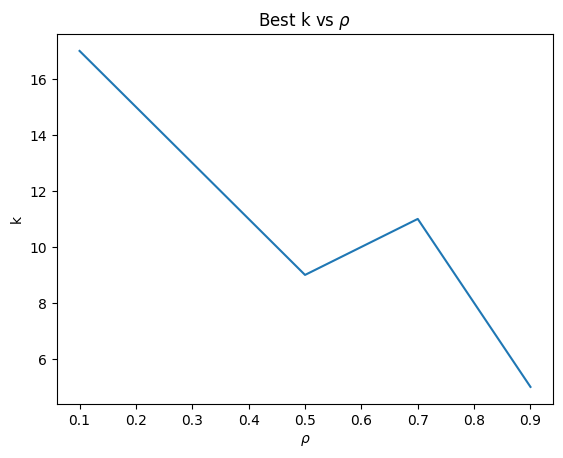

In [32]:
plt.plot([0.1, 0.3, 0.5, 0.7, 0.9], best_k)
plt.xlabel("$\\rho$")
plt.ylabel("k")
plt.title("Best k vs $\\rho$")
plt.show()

In [33]:
for n_rep in [1, 5, 10, 20, 30]:
    print("n_rep = ", n_rep, ": ", outCVkNN(X_train, Y_train, 5, n_rep, 0.3))

n_rep =  1 :  [77.78 79.76]
n_rep =  5 :  [70.56 80.71]
n_rep =  10 :  [70.28 81.55]
n_rep =  20 :  [73.33 80.  ]
n_rep =  30 :  [74.17 80.04]


In [34]:
best_k_nrep = []
for n_rep in [1, 5, 10, 20, 30]:
    # print("rho = ", rho, ": ", outCVkNN(X_train, Y_train, 5, 10, rho))
    aaa = []
    for k in range(1, 23, 2):
        knnout = outCVkNN(X_train, Y_train, k, n_rep, 0.3)
        aaa.append(knnout)
    best_k_nrep.append(np.argmax([x[0] for x in aaa])*2+1)
    # print('N_rep = ' + str(rho) + ': k = ', np.argmax([x[0] for x in aaa])*2+1, 'is the best k for hold-out')
    print('For = ' + str(n_rep) + ' repetitions: k = ', np.argmax([x[0] for x in aaa])*2+1, 'is the best')


For = 1 repetitions: k =  13 is the best
For = 5 repetitions: k =  7 is the best
For = 10 repetitions: k =  15 is the best
For = 20 repetitions: k =  11 is the best
For = 30 repetitions: k =  15 is the best


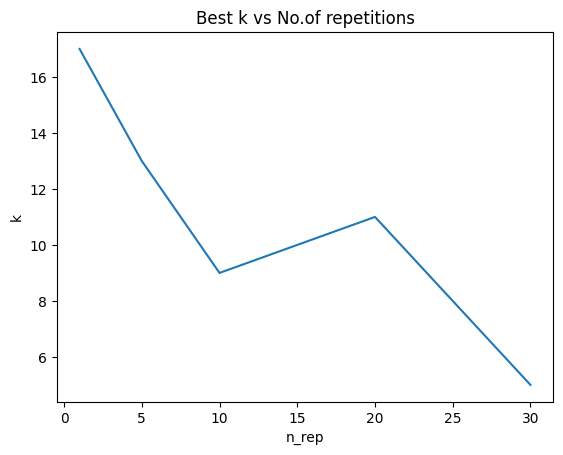

In [35]:
#k vs n_rep
plt.plot([1, 5, 10, 20, 30], best_k)
plt.xlabel('n_rep')
plt.ylabel('k')
plt.title('Best k vs No.of repetitions')
plt.show()

(c) Apply the model obtained by cross-validation (i.e., best k) to the test set and check if
there is an improvement on the classification error over the result of (1).

In [36]:
acc_cv = 100 * np.count_nonzero(kNNClassify(X_train, Y_train, X_test, k_best) == Y_test)/len(Y_test)
# Accuracy
print("Classification accuracy: ", acc_cv)

Classification accuracy:  66.125


In [37]:
if acc_cv > accuracy:
    print("Improved accuracy over (1)")
    
else:
    print("No improvement over (1)")

Improved accuracy over (1)
